In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [77]:
#1 import dataset

import numpy as np
import pandas as pd
import keras.datasets as ds
#load_dataset
(X_train, y_train), (X_test, y_test) = ds.fashion_mnist.load_data()
#check shape of dataset and rank 
y=X_train.shape
print('shape of dataframe',y)

shape of dataframe (60000, 28, 28)


shape of dataframe has no pixel value 1 or 3; 1=> grayscale 3=>rgb




In [78]:
#check rank of dataset 
import  numpy as np
def shape_rank(train_data,test_data):
    global X_train,X_test
    if len(y)==4 :   
        print ("no need to convert")
    #afte that we reshape the array size 
    else :
        X_train=train_data.reshape((-1,y[1],y[2],1))
        X_test=test_data.reshape((-1,y[1],y[2],1))
    #return  x_train,x_test
shape_rank(X_train,X_test)


In [79]:
print("after reshape the array ",X_train.shape)

after reshape the array  (60000, 28, 28, 1)


1 => grayscale image  

In [80]:
#import all libraries 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Activation,MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
#

In [81]:
# now split y dataset or predictor dataset into categories

def categorical(Y_train_data,y_test_data,num_classes):
    global y_train,y_test
    y_train = np_utils.to_categorical(Y_train_data, num_classes)
    y_test = np_utils.to_categorical(y_test_data, num_classes)
    #return y_train1,y_test1
num=int(input("enter classes or label no."))
categorical(y_train,y_test,num)
print("y data shape",y_train.shape,y_test.shape)
#split dataset 

enter classes or label no.10
y data shape (60000, 10) (10000, 10)


In [82]:
#split data set 
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, y_train, test_size=0.2)
img_size=X_train[0].shape
print("image length,width,and format",img_size)

image length,width,and format (28, 28, 1)


In [83]:
input_shape = (img_size[0],img_size[1],img_size[2])
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10)


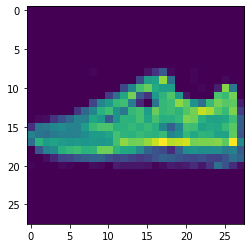

In [84]:
import matplotlib.pyplot as plt
g = plt.imshow(X_train[0][:,:,0])


In [85]:
#now initialize Sequential layer 
model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',
                     input_shape = (img_size[0],img_size[1],img_size[2])))
model.add(BatchNormalization())


In [108]:

def layers():

    
#1
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
#2
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
#3
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.25))
#4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))


In [87]:
#call the function
layers()

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 16)       

In [89]:
#add dense layer output layer

model.add(Dense(10,activation='sigmoid'))


In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 16)       

In [91]:
#compile 
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0003, decay=1e-4),metrics=['accuracy'])

In [92]:
#image augmentation rotate dataset images and increase image set and its avoid overfitting
from keras.preprocessing.image  import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1./255)
#train_data.flow_from_directory('')
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)



In [93]:
datagen.fit(X_train)

In [94]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                           #steps_per_epoch=200,
                           epochs=10, 
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_valid, Y_valid))
                           


Epoch 1/10
375/375 - 14s - loss: 0.9540 - accuracy: 0.6466 - val_loss: 0.6047 - val_accuracy: 0.7644
Epoch 2/10
375/375 - 13s - loss: 0.6388 - accuracy: 0.7590 - val_loss: 0.4882 - val_accuracy: 0.8175
Epoch 3/10
375/375 - 13s - loss: 0.5623 - accuracy: 0.7899 - val_loss: 0.4118 - val_accuracy: 0.8455
Epoch 4/10
375/375 - 13s - loss: 0.5181 - accuracy: 0.8063 - val_loss: 0.4045 - val_accuracy: 0.8515
Epoch 5/10
375/375 - 14s - loss: 0.4841 - accuracy: 0.8195 - val_loss: 0.4025 - val_accuracy: 0.8468
Epoch 6/10
375/375 - 13s - loss: 0.4564 - accuracy: 0.8307 - val_loss: 0.3604 - val_accuracy: 0.8682
Epoch 7/10
375/375 - 13s - loss: 0.4347 - accuracy: 0.8371 - val_loss: 0.3427 - val_accuracy: 0.8736
Epoch 8/10
375/375 - 13s - loss: 0.4190 - accuracy: 0.8455 - val_loss: 0.3331 - val_accuracy: 0.8763
Epoch 9/10
375/375 - 13s - loss: 0.4049 - accuracy: 0.8499 - val_loss: 0.3115 - val_accuracy: 0.8879
Epoch 10/10
375/375 - 14s - loss: 0.3907 - accuracy: 0.8565 - val_loss: 0.3075 - val_accura

In [95]:
final_loss, final_acc = model.evaluate(X_valid, Y_valid, verbose=0)


In [118]:
print(final_loss,final_acc)

0.3075215518474579 0.8847500085830688


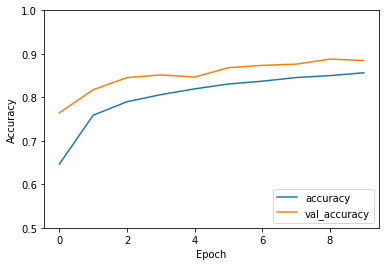

In [96]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [100]:
# 2 dataset 
#load_dataset
(X1_train, y_train), (X1_test, y_test) = ds.cifar10.load_data()
#check shape of dataset and rank 
y=X1_train.shape
print('shape of dataframe',y1)

shape of dataframe (50000, 32, 32, 3)


In [98]:
shape_rank(X1_train,X1_test)


no need to convert


In [101]:
num1=int(input("enter classes or label no."))
categorical(y_train,y_test,num)
print("y data shape",y_train.shape,y_test.shape)

enter classes or label no.10
y data shape (50000, 10) (10000, 10)


In [103]:
#split data set into train and valid 
from sklearn.model_selection import train_test_split
x1_train, X1_valid, Y1_train, y1_valid = train_test_split(X1_train, y_train, test_size=0.2)

img_size1=x1_train[0].shape
print("image length,width,and format",img_size1)

image length,width,and format (32, 32, 3)


In [104]:
Y1_train.shape


(40000, 10)

In [105]:
#now initialize Sequential layer; we use 16 filters and img_size is already define
model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu',
                     input_shape = (img_size1[0],img_size1[1],img_size1[2])))
model.add(BatchNormalization())

In [109]:
layers()


In [110]:
model.add(Dense(10,activation='sigmoid'))


In [111]:
datagen.fit(x1_train)


In [112]:
#model.compile
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0003, decay=1e-4),metrics=['accuracy'])


In [113]:

his = model.fit_generator(datagen.flow(x1_train, Y1_train, batch_size=128),
                           #steps_per_epoch=200,
                           epochs=10, 
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X1_valid, y1_valid))

Epoch 1/10
313/313 - 20s - loss: 1.9189 - accuracy: 0.2900 - val_loss: 1.9374 - val_accuracy: 0.3283
Epoch 2/10
313/313 - 20s - loss: 1.6032 - accuracy: 0.4185 - val_loss: 1.4459 - val_accuracy: 0.4826
Epoch 3/10
313/313 - 25s - loss: 1.4745 - accuracy: 0.4633 - val_loss: 1.3658 - val_accuracy: 0.5105
Epoch 4/10
313/313 - 21s - loss: 1.3955 - accuracy: 0.4970 - val_loss: 1.2730 - val_accuracy: 0.5398
Epoch 5/10
313/313 - 20s - loss: 1.3325 - accuracy: 0.5206 - val_loss: 1.1735 - val_accuracy: 0.5769
Epoch 6/10
313/313 - 20s - loss: 1.2698 - accuracy: 0.5446 - val_loss: 1.1183 - val_accuracy: 0.6025
Epoch 7/10
313/313 - 21s - loss: 1.2269 - accuracy: 0.5604 - val_loss: 1.1234 - val_accuracy: 0.5998
Epoch 8/10
313/313 - 21s - loss: 1.1833 - accuracy: 0.5757 - val_loss: 1.0872 - val_accuracy: 0.6121
Epoch 9/10
313/313 - 21s - loss: 1.1537 - accuracy: 0.5901 - val_loss: 1.1482 - val_accuracy: 0.5942
Epoch 10/10
313/313 - 21s - loss: 1.1232 - accuracy: 0.6022 - val_loss: 1.1538 - val_accura

In [ ]:
Final1_loss, Final1_acc = model.evaluate(X1_valid, y1_valid, verbose=0)
print(Final1_loss,Final1_acc)

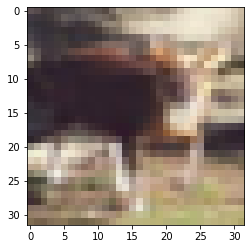

In [117]:
import matplotlib.pyplot as plt

g = plt.imshow(x1_train[10])

In [ ]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')